**Face Recognition for online transaction**


1.   We are doing the Face Recognition using OpenCV.
2.    We are taking 30 sample photos of 10 people and we are cropping only the face for the face recognition.



In [ ]:
import os #used to access files
import numpy as np
import cv2 #OpenCV library used for preprocessing image data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path='/content/drive/MyDrive/Dataset_Face'

labels=os.listdir(data_path) #loading the labels of the data present in the folder
categories=np.arange(len(labels)) #generating keys for labels
category_dict=dict(zip(labels,categories)) #converting into key: labels dictionary

print("lables=",labels)
print("categories=",categories)
print("category_dict=",category_dict)

lables= ['Bratasee', 'Abir', 'Agnibh', 'Harsha', 'Keerthana', 'Anubhav']
categories= [0 1 2 3 4 5]
category_dict= {'Bratasee': 0, 'Abir': 1, 'Agnibh': 2, 'Harsha': 3, 'Keerthana': 4, 'Anubhav': 5}


In [ ]:
face_classifier=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml') #loading haarcascade face classfier

data=[]
target=[]


In [ ]:
from google.colab.patches import cv2_imshow
#loading images
for label in labels:#each folder
    imgs_path=os.path.join(data_path,label) #creates a new path to get inside each folder ie data_path\folder_name
    img_names=os.listdir(imgs_path) #converts image names into an array
    path="/content/drive/MyDrive/Dataset/Pre-Processed-Pictures"
    path=path+'/'+label+'1'
    os.mkdir(path)
    os.chdir(path)
    #print(img_names)

    for img_name in img_names: #each image in a folder
        img_path=os.path.join(imgs_path,img_name) #path of every image
        #print(img_path)
        img=cv2.imread(img_path) #loads each image into an array

        #to display loaded images
        #cv2_imshow(img)
        #cv2_imshow(gray) #to view the images in grayscale
        #key=cv2.waitkey(1000) time gap between each image
        #if(key==27): escape key to stop slide show
            #break
        #cv2.destroyAllWindows()

        #preprocessing starts
        #convert colour images to grey
        gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        #using haarcascade classifier to detect faces from the gray images
        faces=face_classifier.detectMultiScale(gray, 1.3, 5) #array of dimensions x,y,w,h if the picture has multiple faces? detects someother things as faces


        for (x,y,w,h) in faces:

              #lets draw a rectangle on each ROI
           cv2.rectangle(img,(x,y),(w+x,h+y),(127,0,255),2) #image,point1,point2,color of rectangle,thickness of rectangle
           cv2_imshow(img)
            #cv2.waitKey(1000)

           cropped_face=gray[y:y+h,x:x+w]

            #key=cv2.waitKey(1)#wait till a key is pressed
            #if(key==121):#press y if img is accepted
           cropped_face=cv2.resize(cropped_face,(50,50)) #make a common size for all cropped faces
           cv2_imshow(cropped_face)#showing cropped faces and wrong cropped items
           file = r"processed{}.jpg".format(img_name)
           cv2.imwrite(file, cropped_face)

           print("Image is accepted")


            #else:
             #   print('image isnt accepted')
              #  pass #donot take into the dataset
cv2.destroyAllWindows()



#End of Pre-Processing


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Constants
IMAGE_SIZE = (50,50)
BATCH_SIZE = 32
NUM_CLASSES = 6
EPOCHS = 10
LR = 0.001

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img)
    return np.array(images)

# Function to load dataset from Google Drive folder
def load_dataset(folder_path):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder_path):
        if len(files) > 0:
            label = os.path.basename(subdir)
            for file in files:
                image_path = os.path.join(subdir, file)
                images.append(image_path)
                labels.append(label)
    return images, labels

# Load dataset
folder_path = "/content/drive/MyDrive/Dataset/Pre-Processed-Pictures"  # Replace with the actual folder path
images, labels = load_dataset(folder_path)

# Split dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
label_to_index = {label: index for index, label in enumerate(set(labels))}
train_labels = [label_to_index[label] for label in train_labels]
val_labels = [label_to_index[label] for label in val_labels]
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=NUM_CLASSES)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=NUM_CLASSES)

# Load and preprocess training images
train_images = load_images(train_images)

# Load and preprocess validation images
val_images = load_images(val_images)

# Create FaceNet model architecture
input_shape = train_images[0].shape
inputs = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(val_images, val_labels))


Epoch 1/10
4/4 [==============================] - 1s 94ms/step - loss: 1.7625 - accuracy: 0.1944 - val_loss: 1.5709 - val_accuracy: 0.2963
Epoch 2/10
4/4 [==============================] - 0s 56ms/step - loss: 1.5711 - accuracy: 0.2593 - val_loss: 1.4255 - val_accuracy: 0.5926
Epoch 3/10
4/4 [==============================] - 0s 52ms/step - loss: 1.3882 - accuracy: 0.6389 - val_loss: 1.2652 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 56ms/step - loss: 1.1443 - accuracy: 0.6944 - val_loss: 0.9600 - val_accuracy: 0.9259
Epoch 5/10
4/4 [==============================] - 0s 49ms/step - loss: 0.7651 - accuracy: 0.9630 - val_loss: 0.7170 - val_accuracy: 0.7778
Epoch 6/10
4/4 [==============================] - 0s 52ms/step - loss: 0.4630 - accuracy: 0.9537 - val_loss: 0.3591 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 62ms/step - loss: 0.2113 - accuracy: 1.0000 - val_loss: 0.3847 - val_accuracy: 0.9259
Epoch 8/10
4/4 [===========

Epoch 1/10
4/4 [==============================] - 0s 60ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9630
Epoch 2/10
4/4 [==============================] - 0s 45ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1190 - val_accuracy: 0.9630
Epoch 3/10
4/4 [==============================] - 0s 45ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1547 - val_accuracy: 0.9259
Epoch 4/10
4/4 [==============================] - 0s 51ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1754 - val_accuracy: 0.9259
Epoch 5/10
4/4 [==============================] - 0s 49ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1850 - val_accuracy: 0.9259
Epoch 6/10
4/4 [==============================] - 0s 43ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1783 - val_accuracy: 0.9259
Epoch 7/10
4/4 [==============================] - 0s 47ms/step - loss: 8.4136e-04 - accuracy: 1.0000 - val_loss: 0.1733 - val_accuracy: 0.9259
Epoch 8/10
4/4 [=======

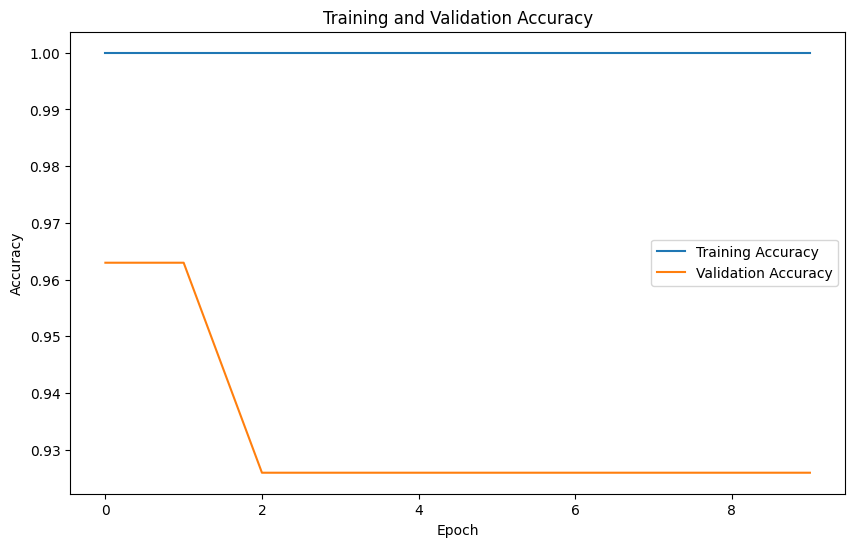

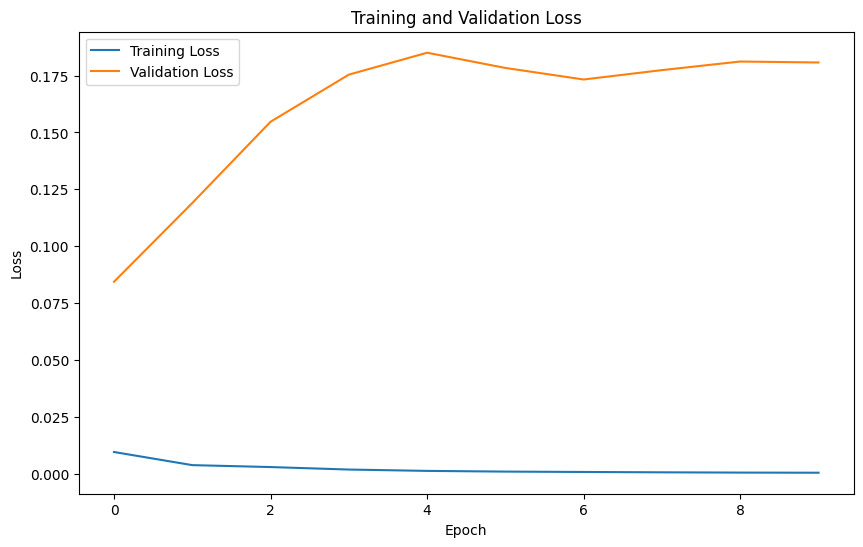

In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(val_images, val_labels))

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
